<a href="https://colab.research.google.com/github/dev02chandan/Biometrics/blob/main/Signature%20Forge%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aim: Compute structural similarity index between signatures

### Step 1: Import Dataset

In [30]:
import pandas as pd 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
! pip install -q kaggle

In [31]:
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [32]:
! cp kaggle.json ~/.kaggle/

In [33]:
! chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle datasets download -d divyanshrai/handwritten-signatures

handwritten-signatures.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
!unzip /content/handwritten-signatures.zip

Archive:  /content/handwritten-signatures.zip
replace Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [36]:
import cv2  
img = cv2.imread('/content/sample_Signature/sample_Signature/genuine/NFI-00101001.png')

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [38]:
from google.colab.patches import cv2_imshow

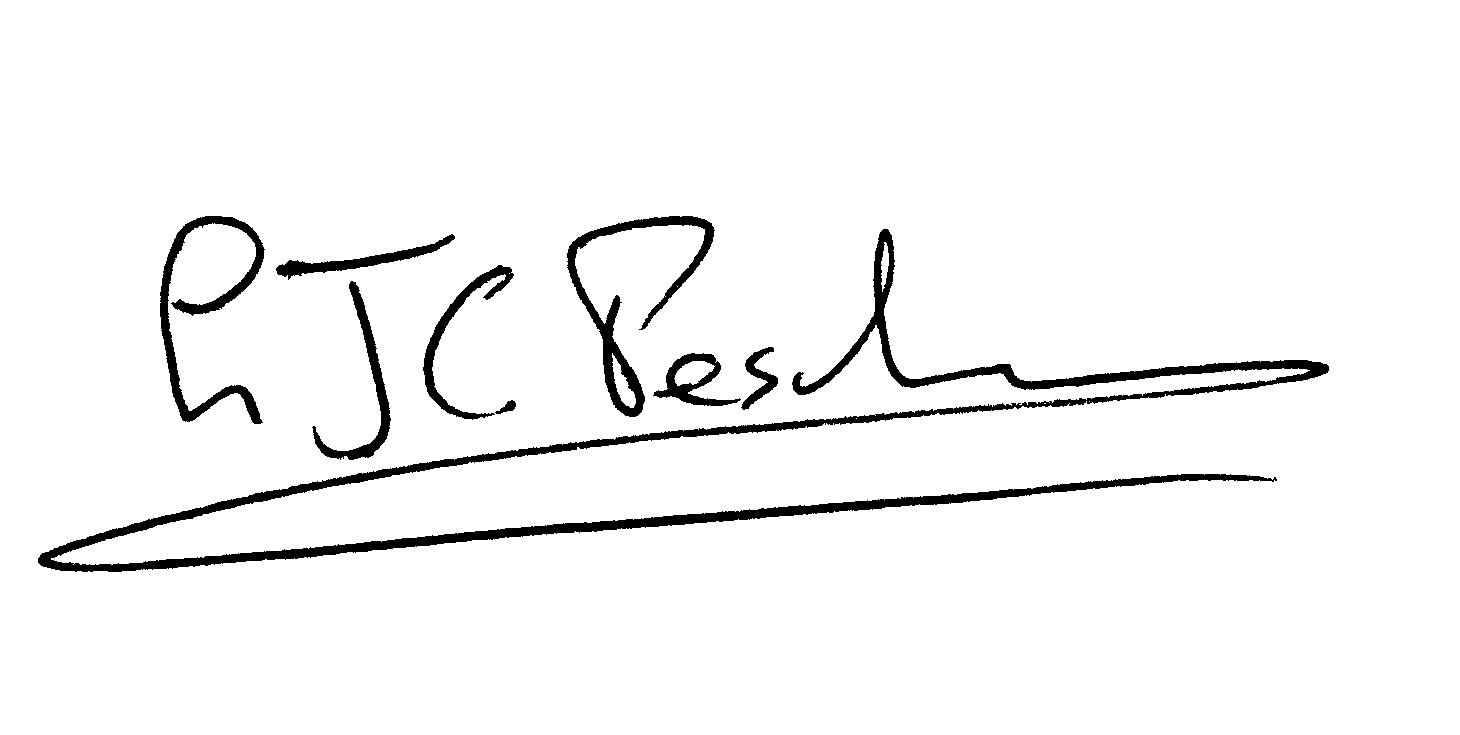

In [39]:
cv2_imshow(gray)

### Step 2: Perform Canny Edge Detection

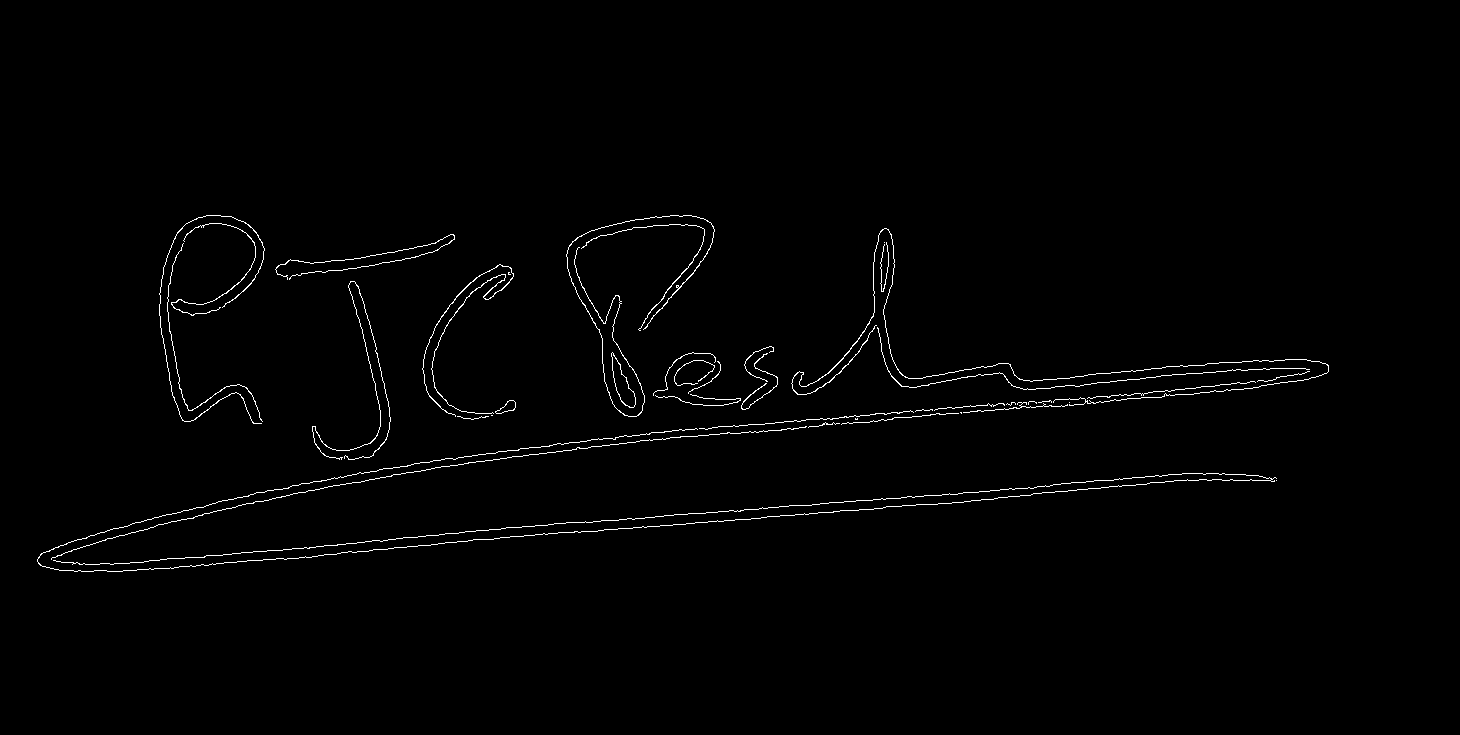

In [40]:
med_val = np.median(gray)

lower = int(max(0, 0.66 * med_val))
upper = int(min(255, 1.33 * med_val))

# apply Canny edge detection
edges = cv2.Canny(img, lower, upper)

# display the edges
cv2_imshow(edges)

### Step 3: Apply Morphological Operations for image enhancement

In [41]:
kernel = np.ones((5,5), np.uint8)

In [42]:
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

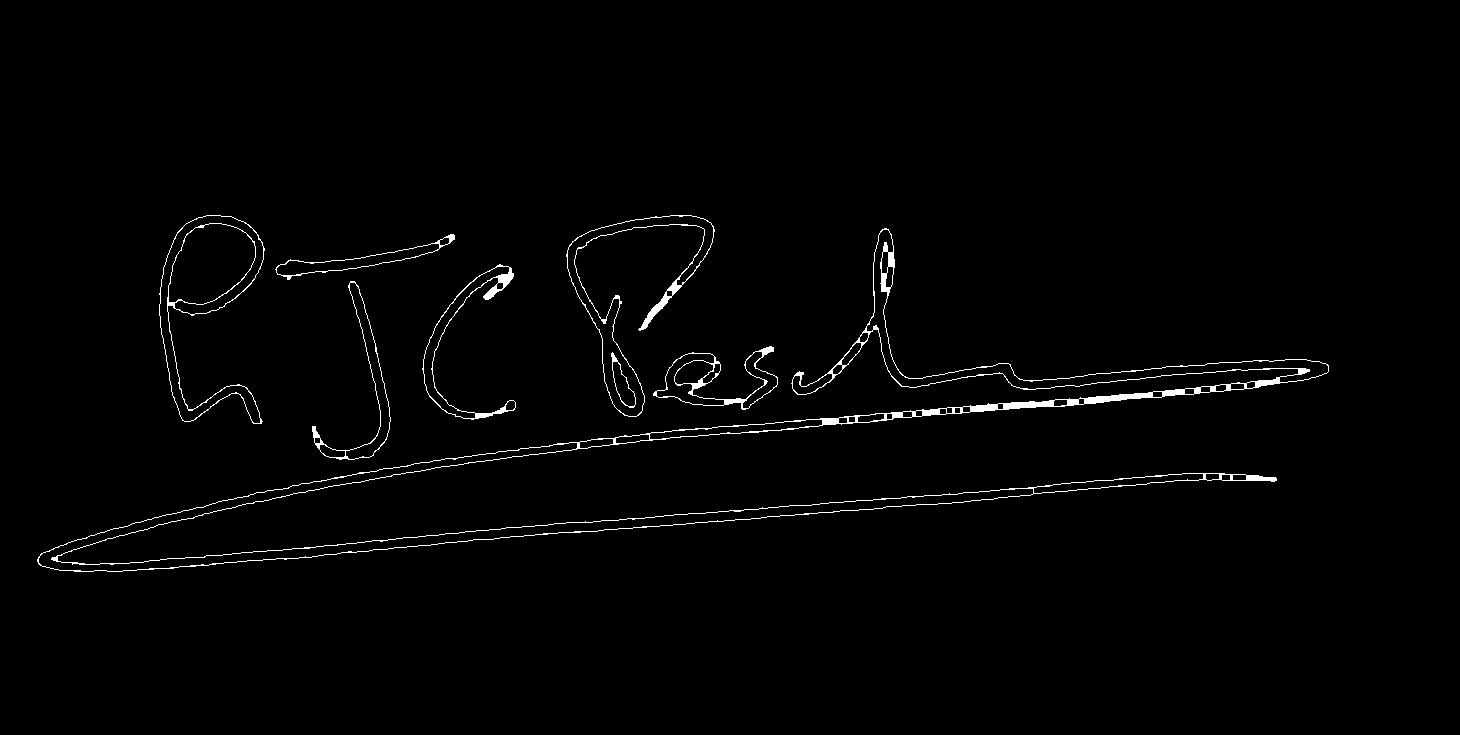

In [43]:
cv2_imshow(closing)

In [44]:
def edges(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    med_val = np.median(gray)

    lower = int(max(0, 0.66 * med_val))
    upper = int(min(255, 1.33 * med_val))
    # apply Canny edge detection
    edges = cv2.Canny(img, lower, upper)

    kernel = np.ones((5,5), np.uint8)
    closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    cv2_imshow(img)
    cv2_imshow(closing)
    return closing


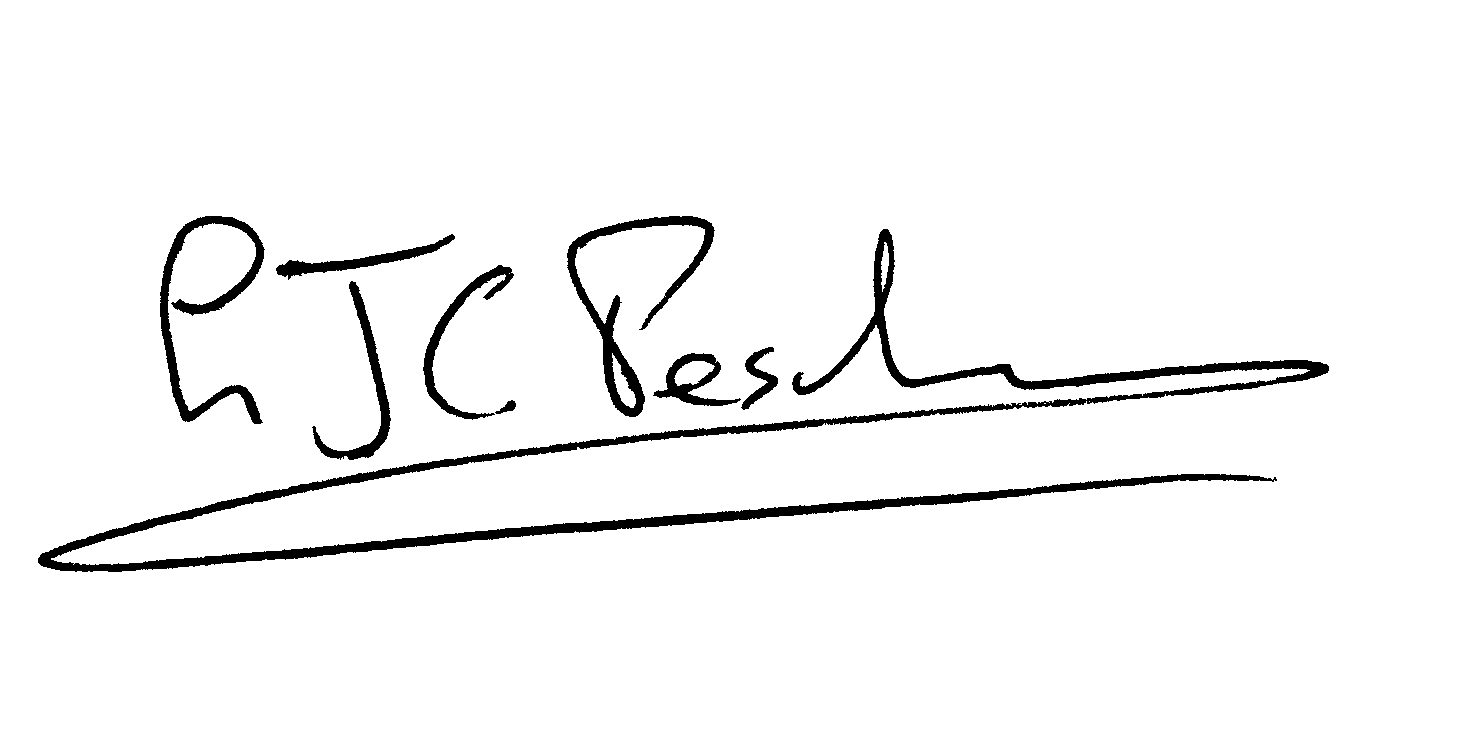

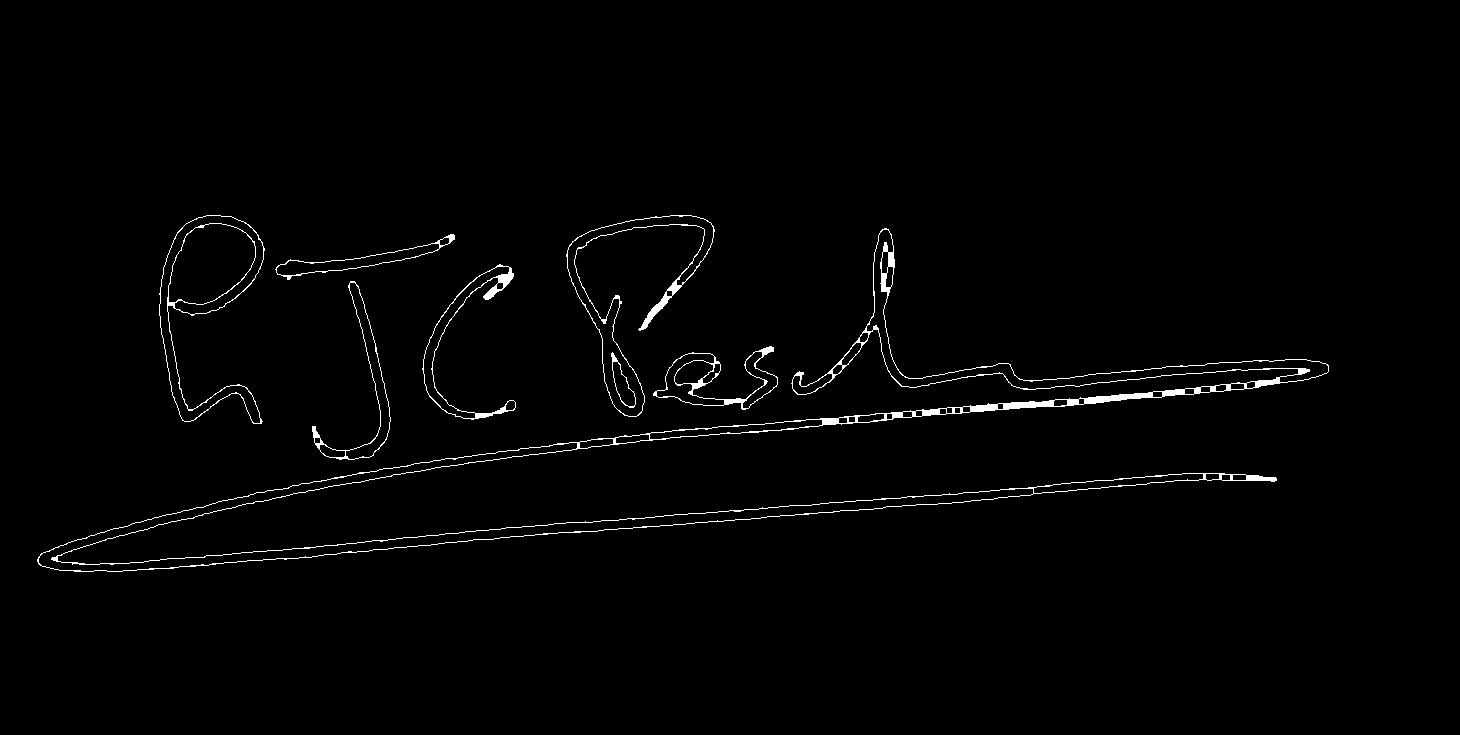

In [45]:
img1 = edges('/content/sample_Signature/sample_Signature/genuine/NFI-00101001.png')

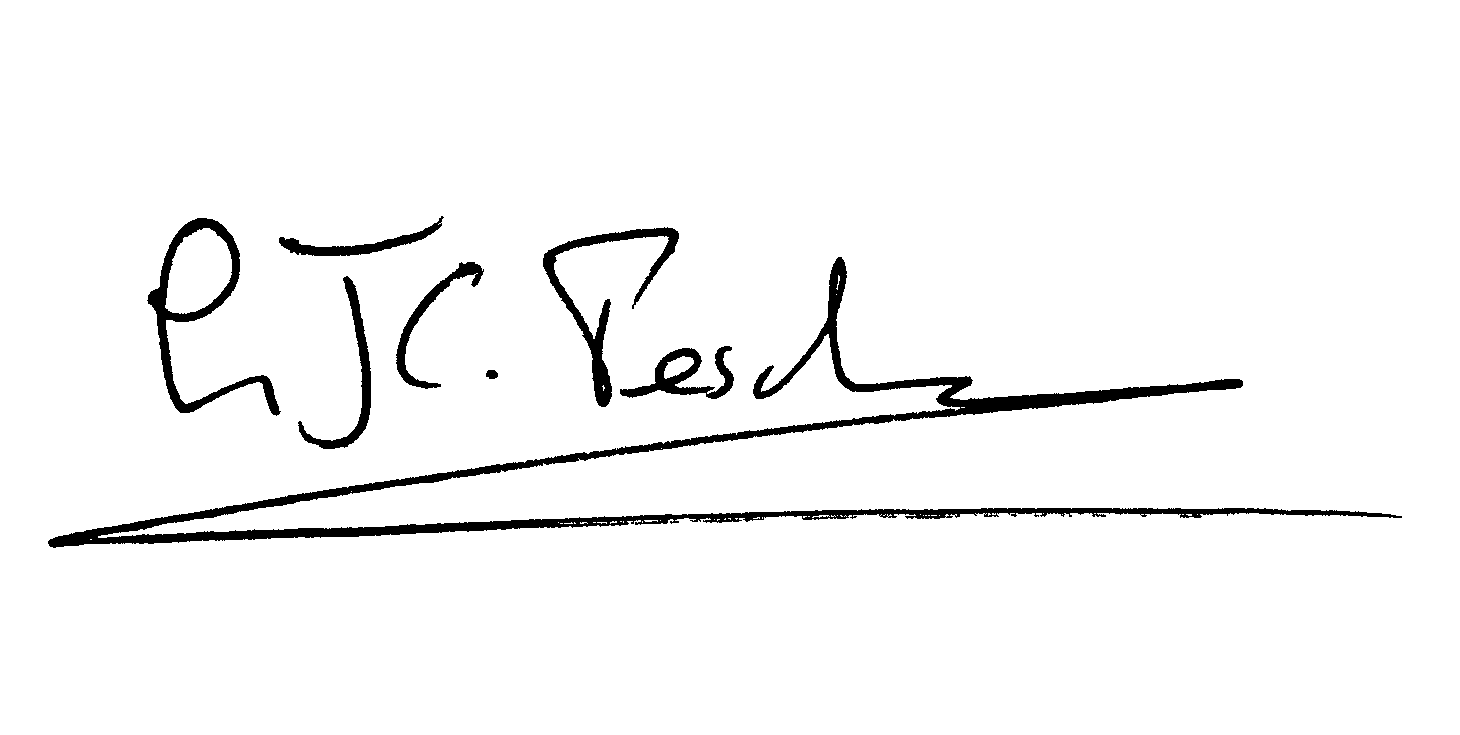

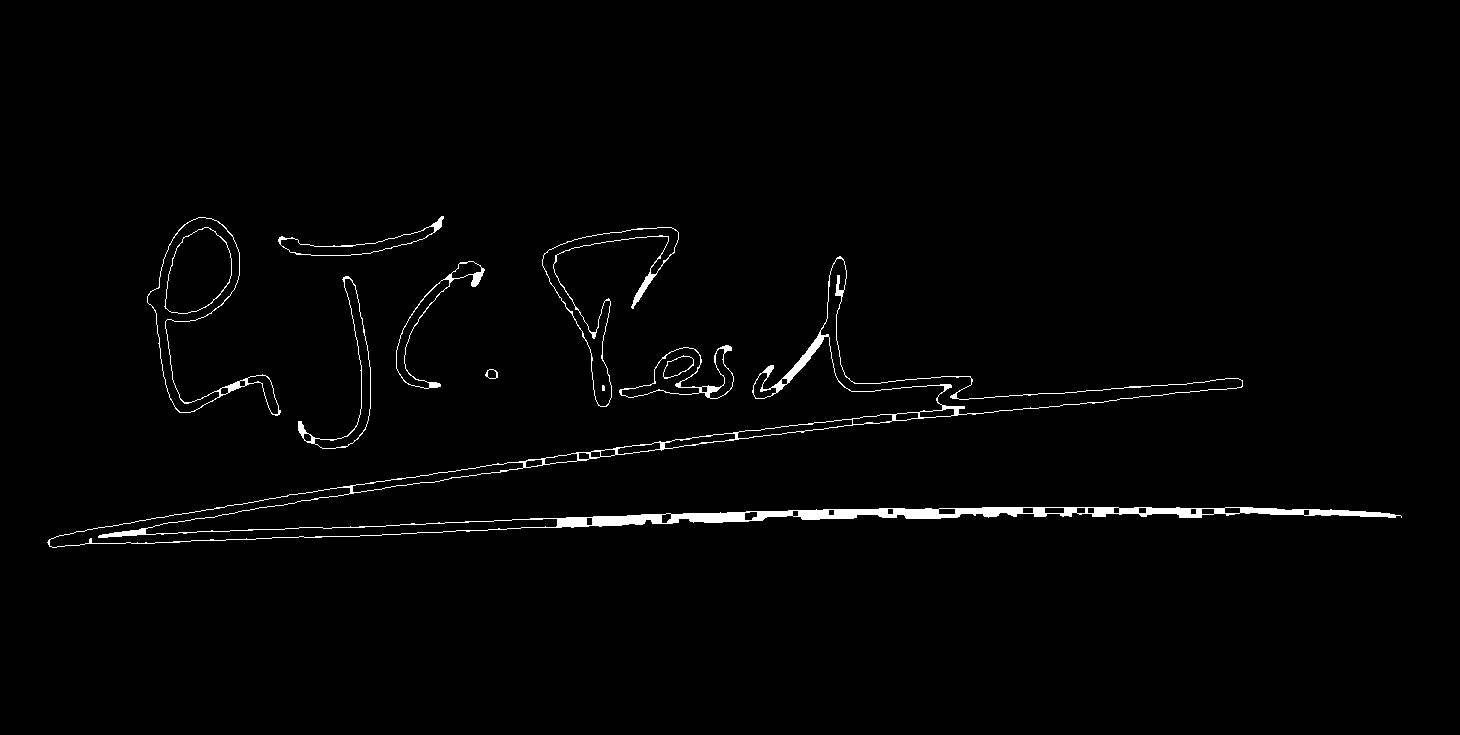

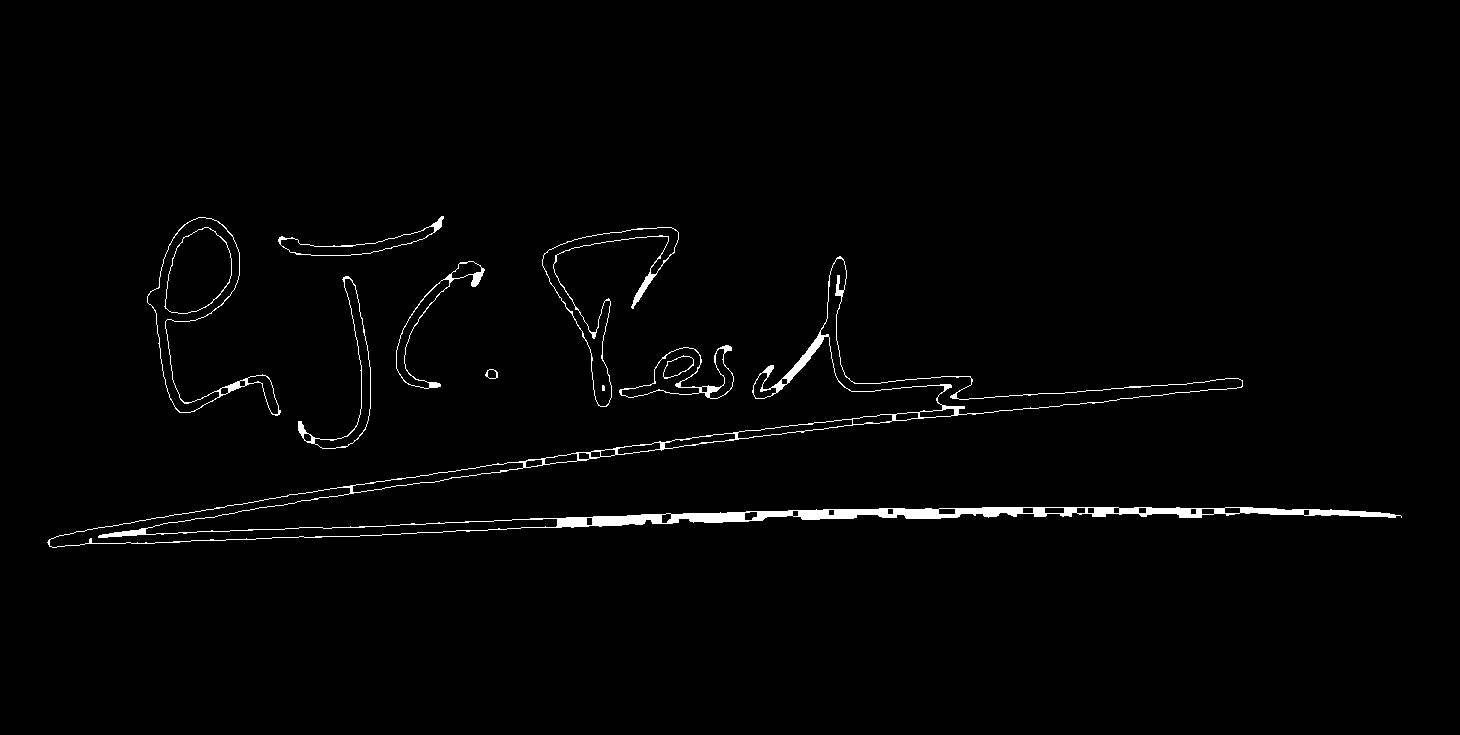

In [46]:
img2 = edges('/content/sample_Signature/sample_Signature/genuine/NFI-00102001.png')
cv2_imshow(img2)

### Step 4: Compute Structural Similarity Index of genuine and Forged Signatures

Structural similarity index is used to measure similarity between two images.

In [47]:
from skimage.metrics import structural_similarity as ssim

In [48]:
ss = ssim(img1, img2)

In [49]:
ss

0.8780794946027858

In [50]:
def compare(path1 , path2):
    img1 = edges(path1)
    img2 = edges(path2)
    
    # if img1.shape!=img2.shape:
    #     width = int(img2.shape[0])
    #     height = int(img2.shape[1])
    #     dim = (width, height)
    #     img1 = np.resize(img1, dim)



    img2 = cv2.resize(img2, img1.shape[::-1])

    score = ssim(img1, img2)
    print("Two images that are being compared: ")
    print("Image 1: ")
    cv2_imshow(img1)
    print("\n Image 2:")
    cv2_imshow(img2)
    return score

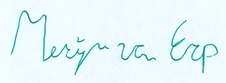

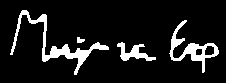

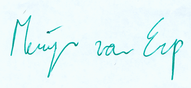

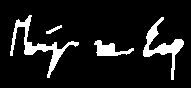

Two images that are being compared: 
Image 1: 


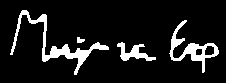


 Image 2:


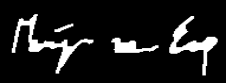

0.6072846692173796

In [51]:
Score = compare('/content/Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png', '/content/Dataset_Signature_Final/Dataset/dataset1/real/00100001.png')

Score

The forge and Real have a score of 0.61 in this case

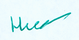

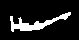

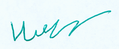

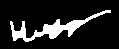

Two images that are being compared: 
Image 1: 


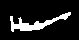


 Image 2:


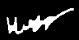

0.45740242850143825

In [54]:
path1 = '/content/Dataset_Signature_Final/Dataset/dataset1/real/01204012.png'
path2 = '/content/Dataset_Signature_Final/Dataset/dataset1/forge/02104012.png'
compare(path1, path2)

Forge and Real have a score of 0.45

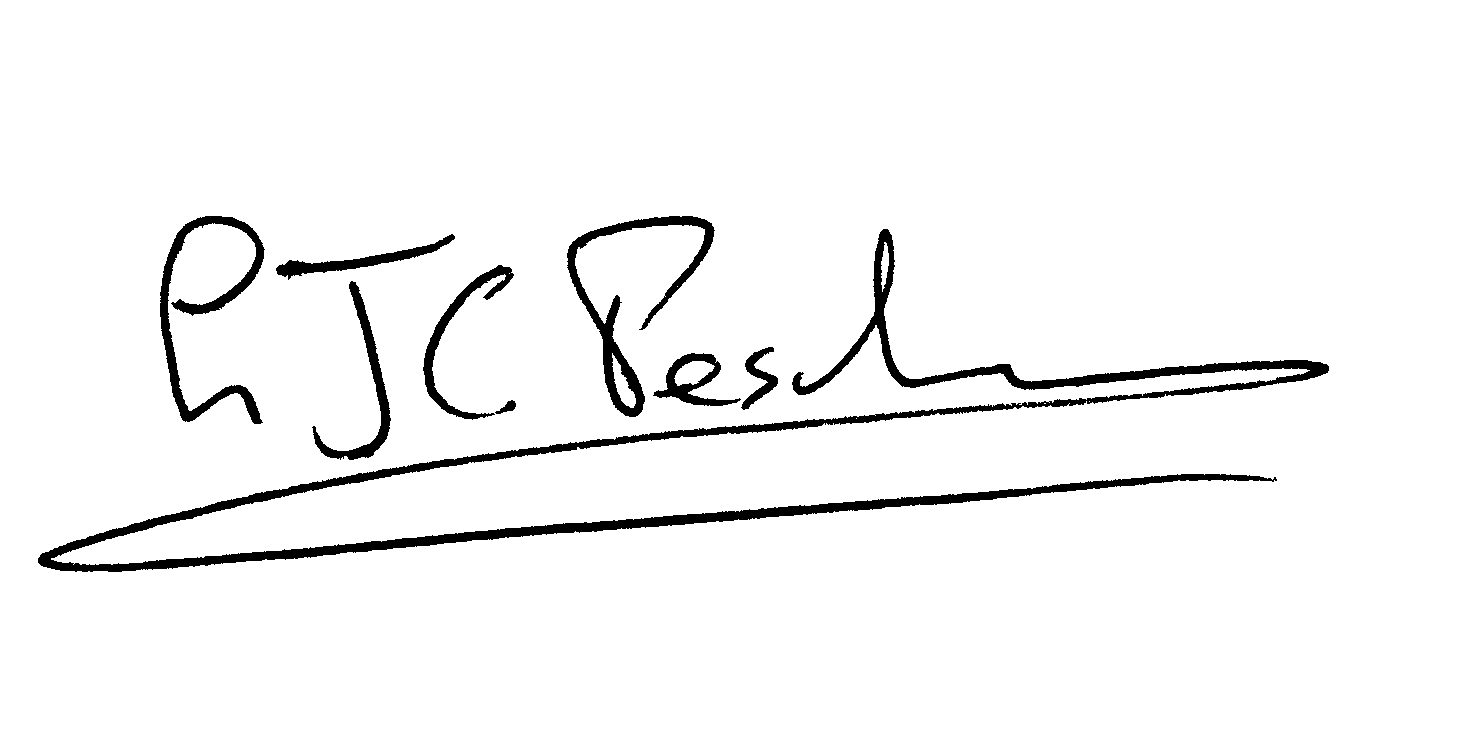

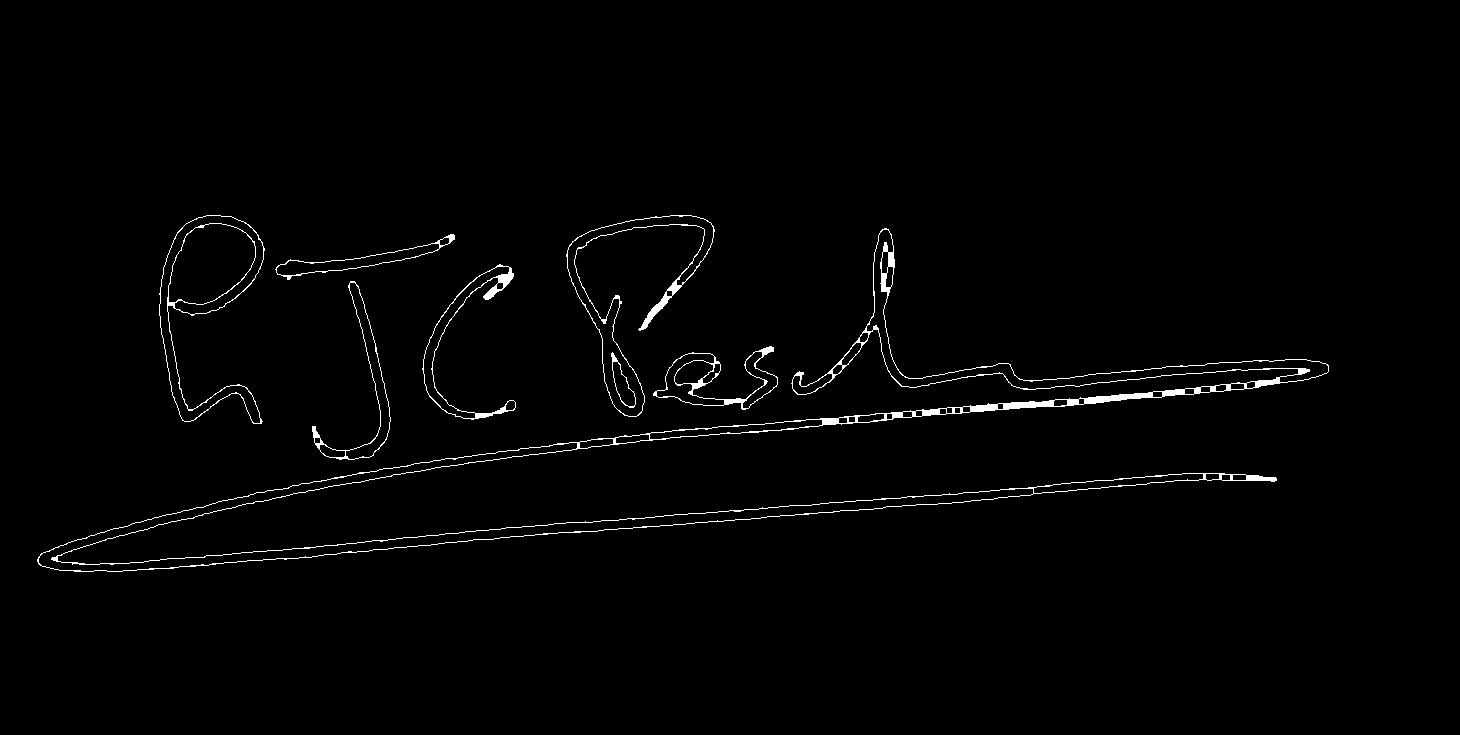

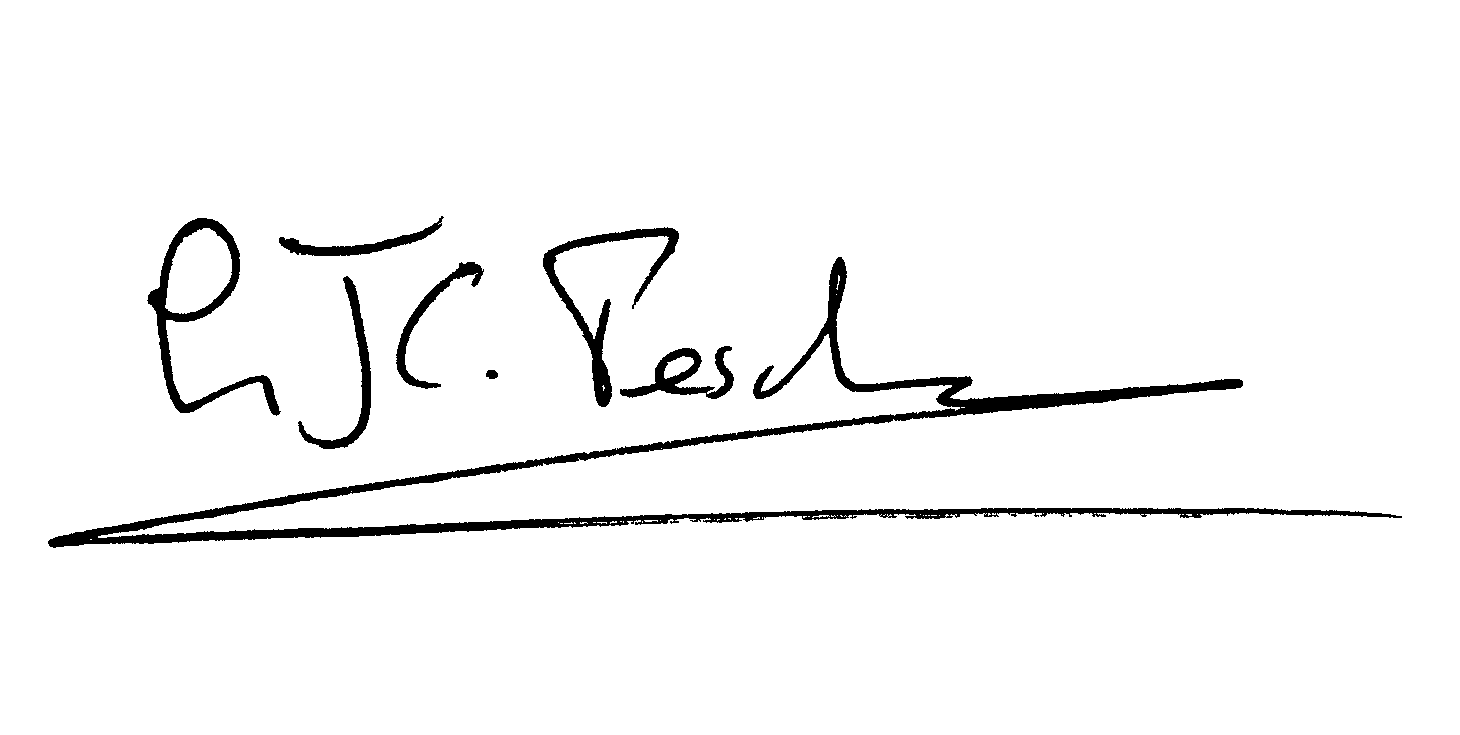

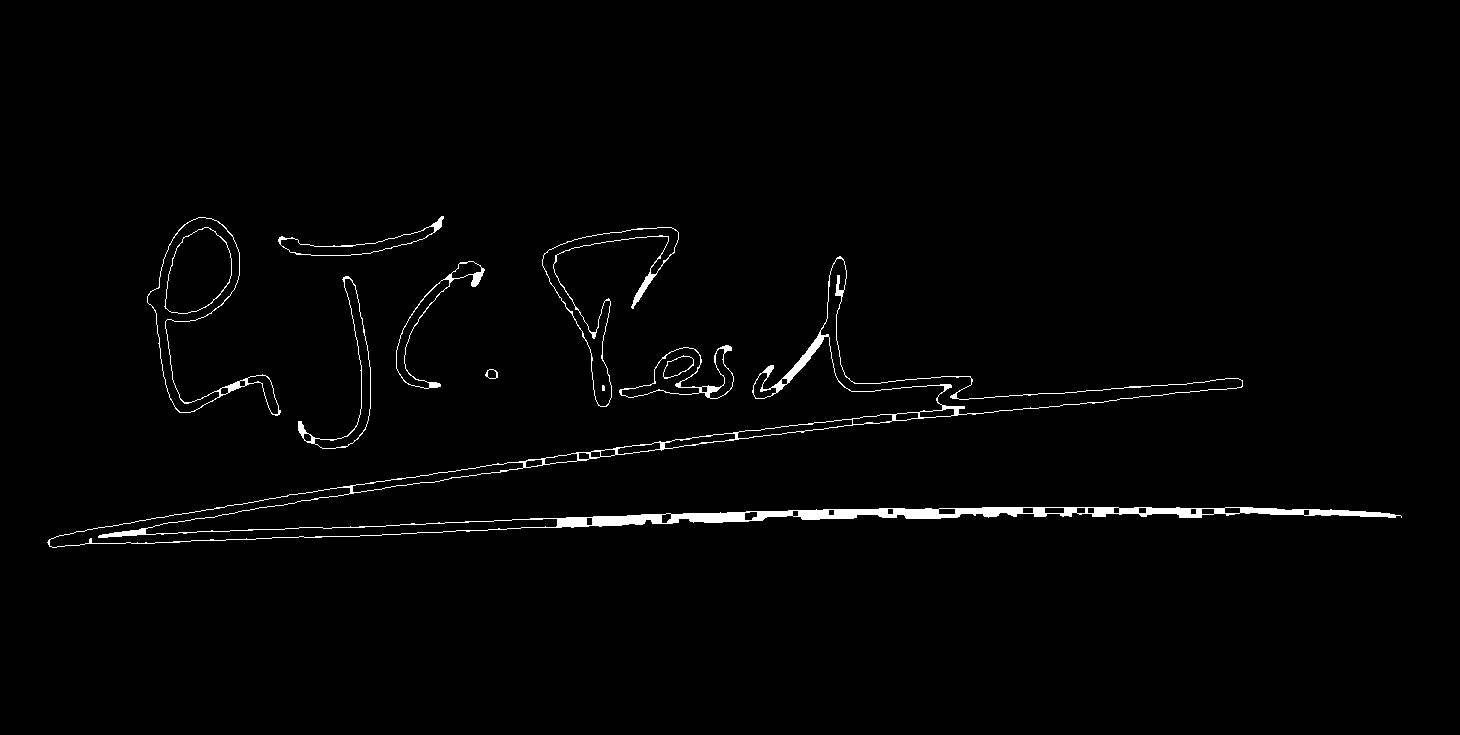

Two images that are being compared: 
Image 1: 


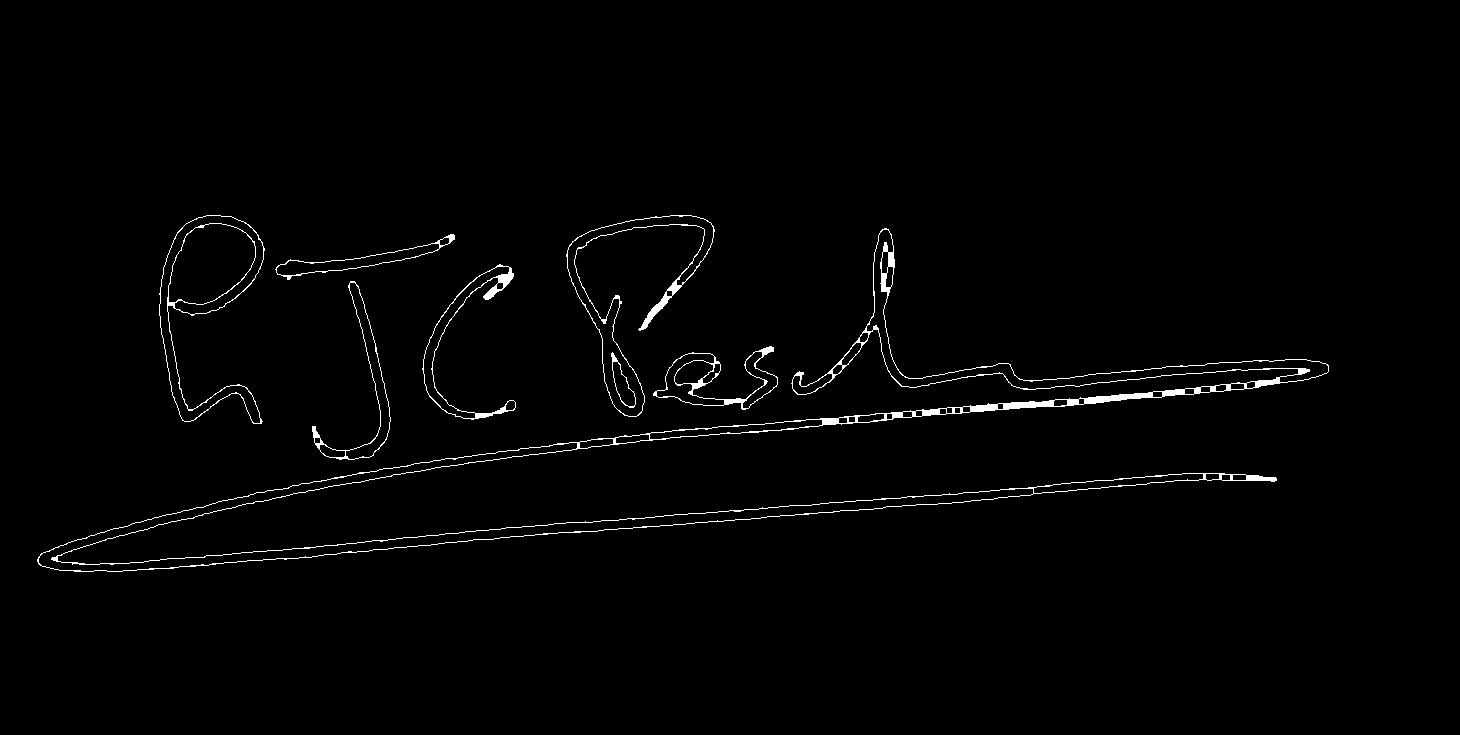


 Image 2:


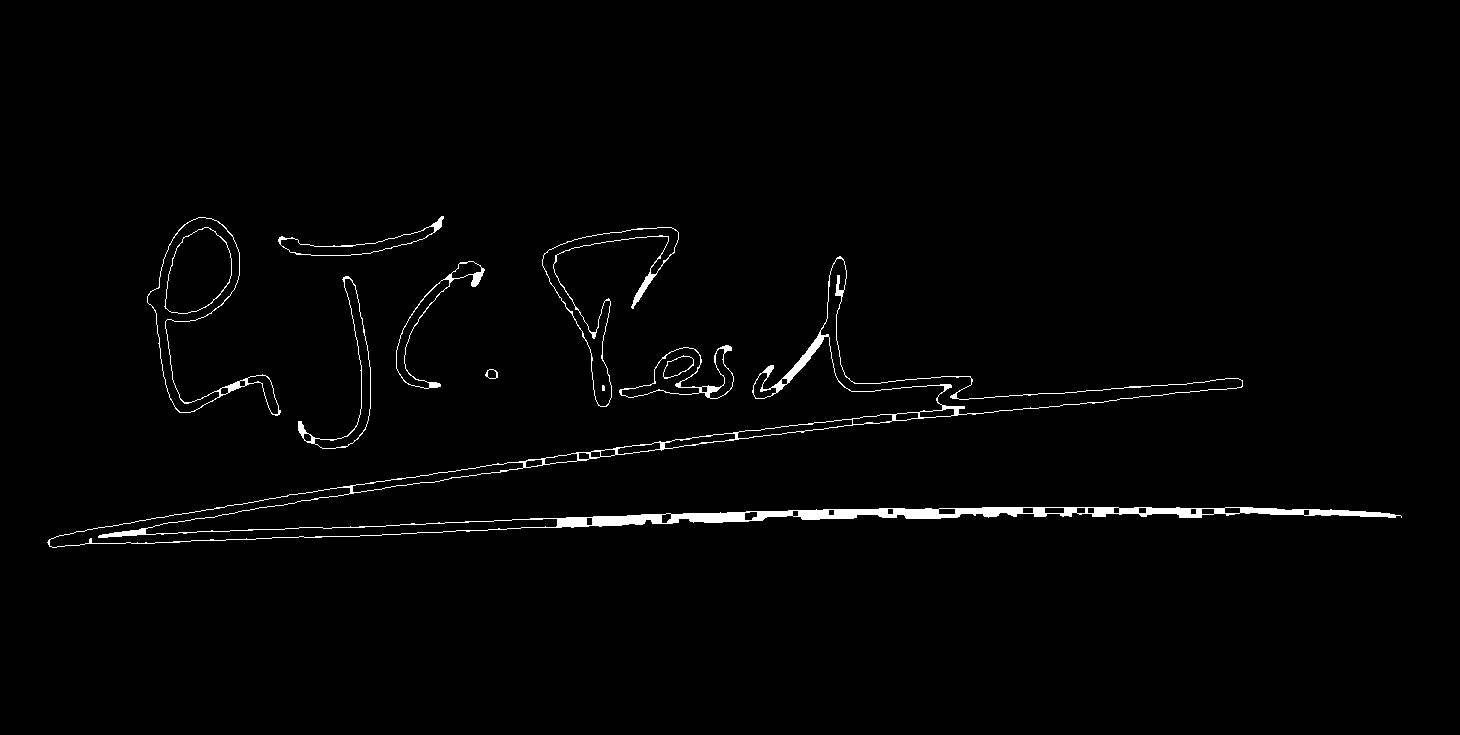

0.8780794946027858

In [55]:
path1 = '/content/Dataset_Signature_Final/Dataset/dataset3/real/00101001.png'
path2 = '/content/Dataset_Signature_Final/Dataset/dataset3/real/00102001.png'
compare(path1, path2)

Two Real ones have a high score of 0.87

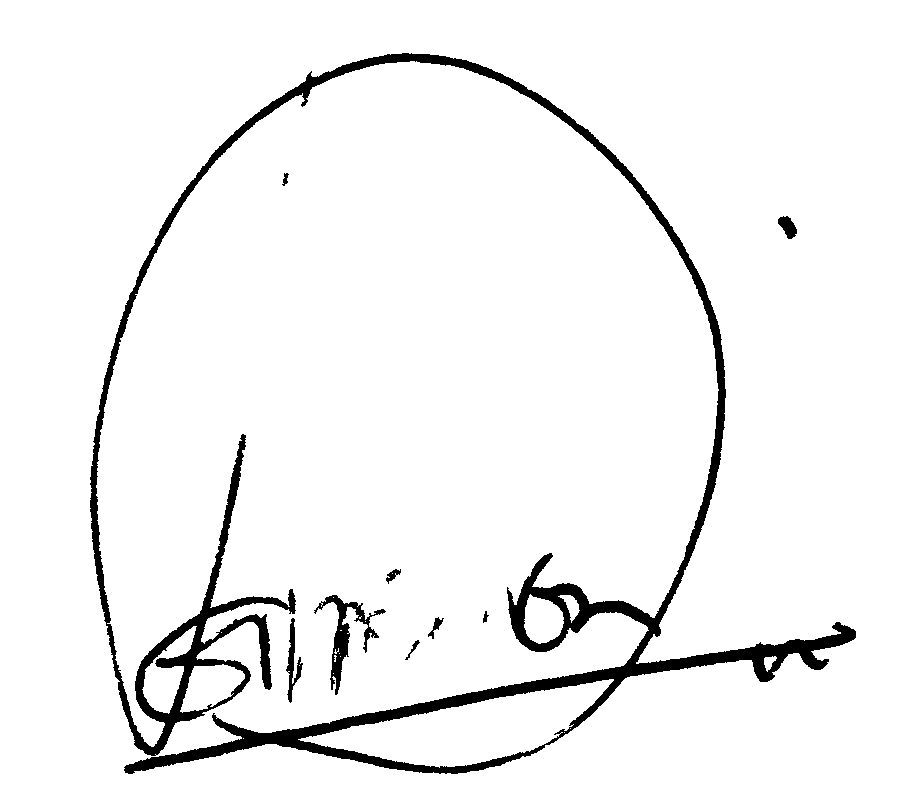

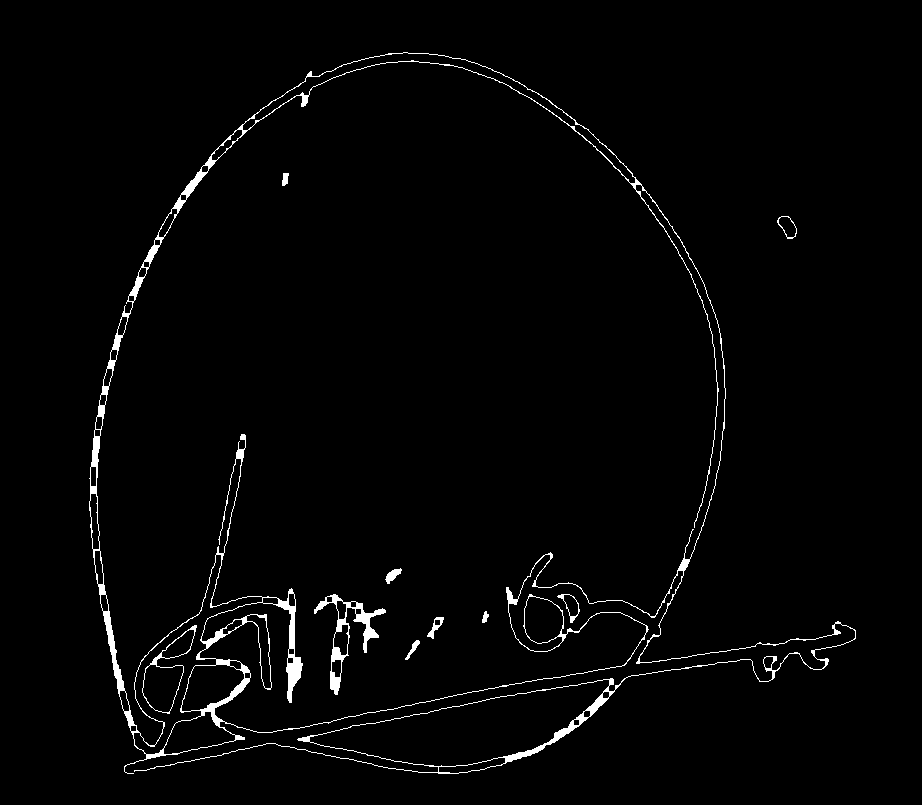

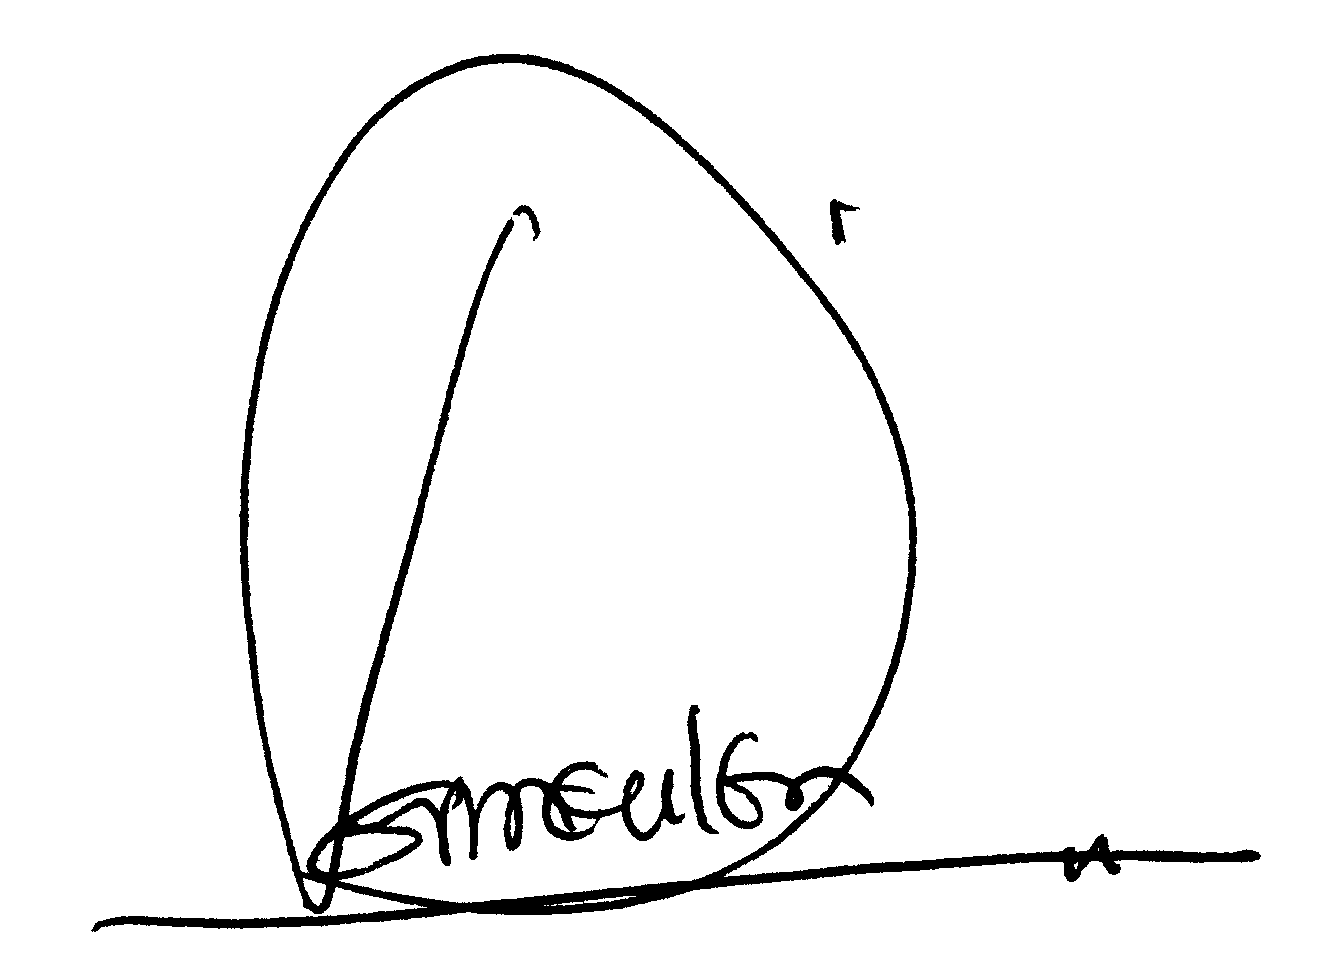

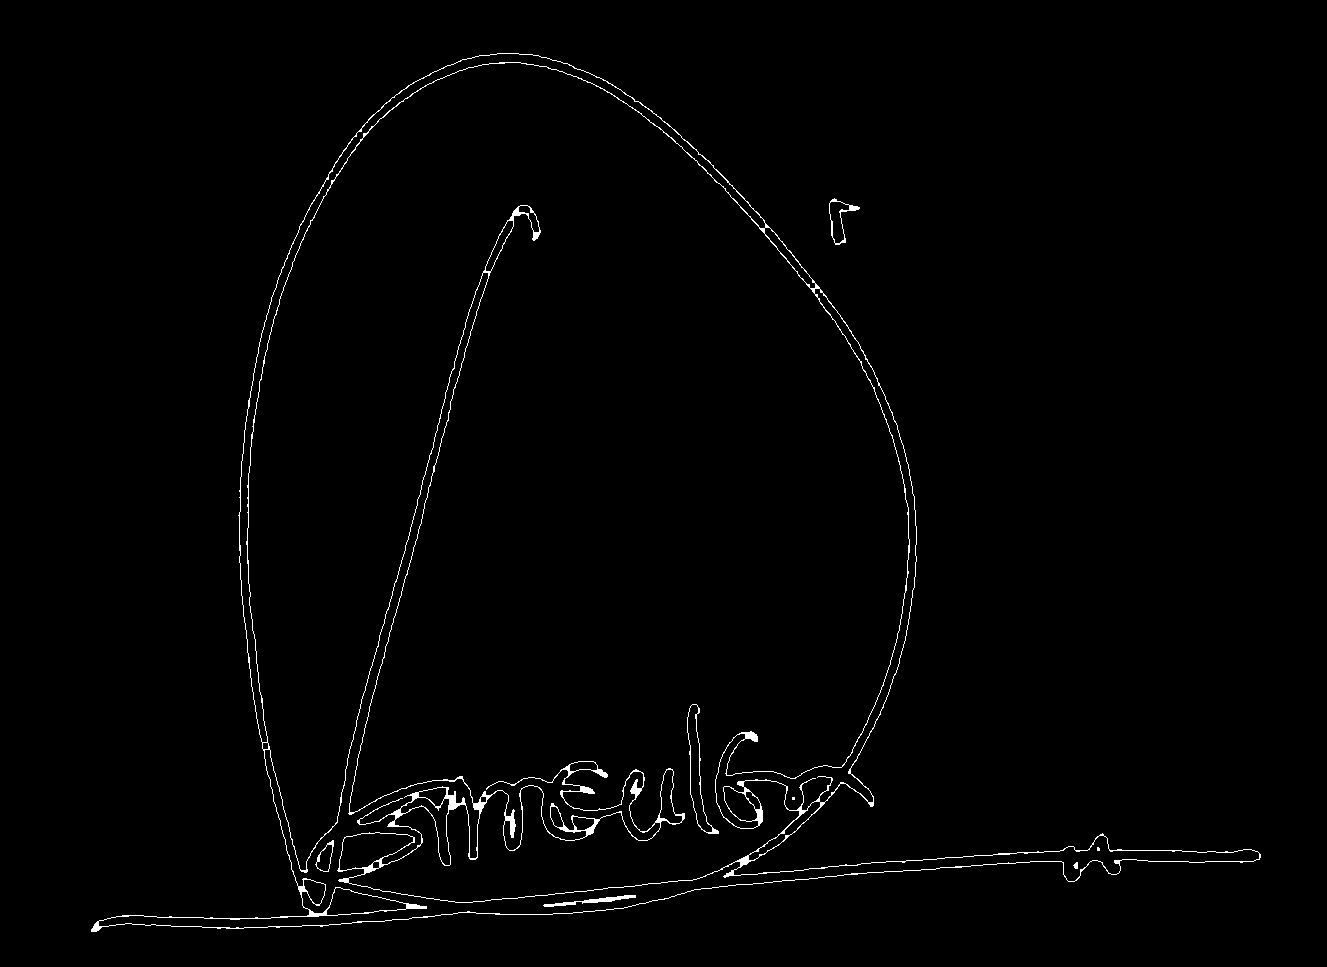

Two images that are being compared: 
Image 1: 


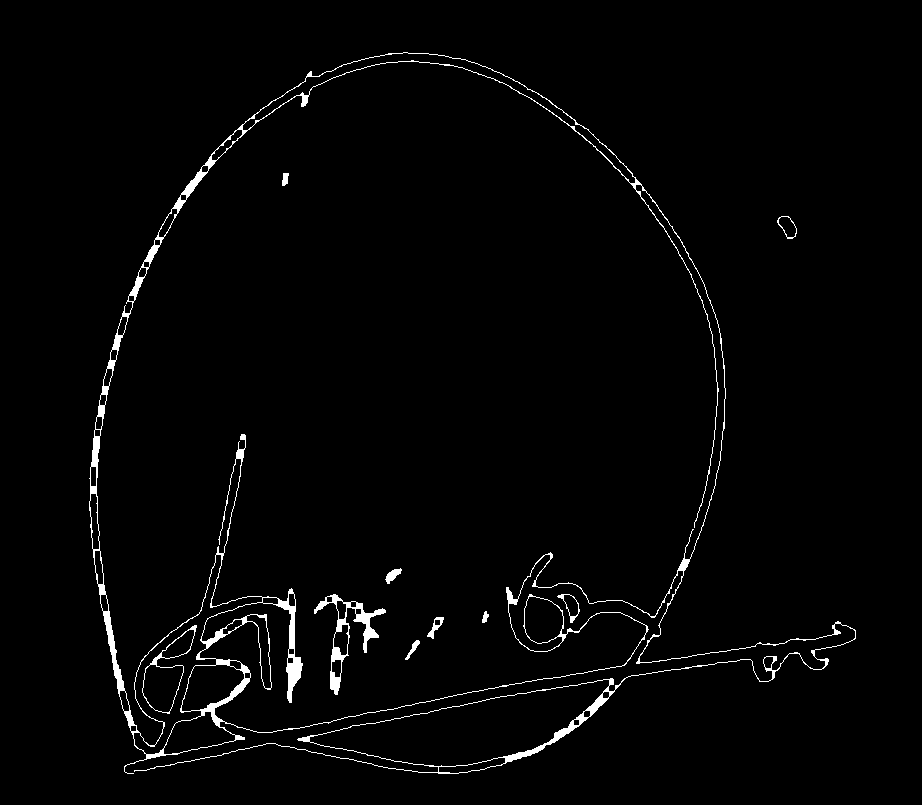


 Image 2:


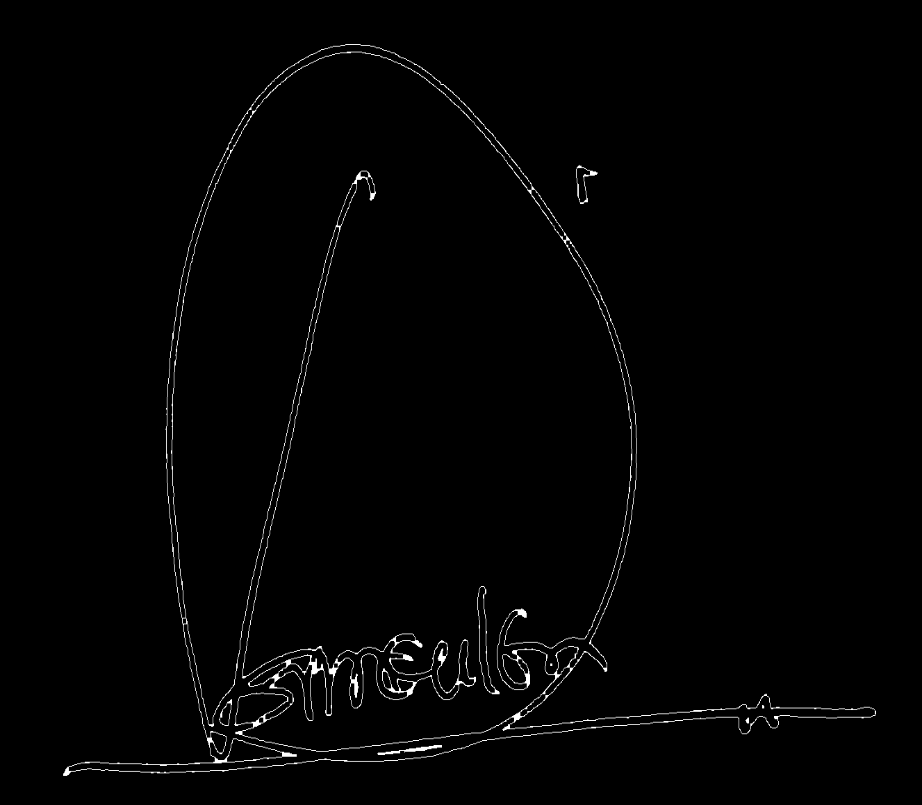

0.8287652690446935

In [56]:
path1 = '/content/Dataset_Signature_Final/Dataset/dataset4/real1/00201002.png'
path2 = '/content/Dataset_Signature_Final/Dataset/dataset4/real1/00202002.png'
compare(path1, path2)

We see two genuine signatures having a high score of 0.82

## Conclusion: 
Hence we can conclude that signature forging can be prevented by using structural similarity index for comparing signatures through this pipeline.